## Black Friday Dataset EDA And Feature Engineering
### Cleaning And Preparing The Data For Model Training

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Problem Statement
##### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

##### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [66]:
#importing the train dataset
df_train = pd.read_csv('train.csv')

In [67]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [68]:
#importing the test dataset
df_test = pd.read_csv('test.csv')

In [69]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [70]:
#Merge both train and test datasets we can do this by using merge,concate and append
dff=pd.concat([df_train, df_test],ignore_index=True)
dff.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [71]:
#Basic information
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [72]:
dff.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [73]:
#Dropping user_id
dff.drop(['User_ID'],axis=1,inplace=True)

In [74]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Data Pre-Processing

### First identify which and all categorical features are there and then convert them into numerical features

#### Handling the catgorical feature Gender

In [75]:
dff['Gender'] = dff['Gender'].map({'F':0,'M':1})

In [76]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### Handling the categorical feature Age

In [77]:
dff['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [78]:
#pd.get_dummies(df['Age'],drop_first=True)

In [79]:
dff['Age'] = dff['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [80]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


#### You can also perform label encoding

In [81]:
#Second technique
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#df['Age'] = label_encoder.fit_transform(df['Age'])
#df['Age'].unique()

In [82]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


#### Handling City_Category column

In [84]:
dff_city = pd.get_dummies(dff['City_Category'],drop_first=True)

In [86]:
dff_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [87]:
dff = pd.concat([dff,dff_city],axis=1)

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,False,False
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,False,False
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,False,False
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,False,False
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,False,True


In [88]:
## Drop city_category
dff.drop('City_Category',axis=1,inplace=True)

In [89]:
dff.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


### Missing Values

In [90]:
dff.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Focus on replacing missing values

In [91]:
dff['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

#### The above will become Discrete features

In [92]:
dff['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

#### Replace the missing value by the mode

In [93]:
dff['Product_Category_2'].mode()[0]

8.0

In [94]:
dff['Product_Category_2'] = dff['Product_Category_2'].fillna(dff['Product_Category_2'].mode()[0])

In [95]:
dff['Product_Category_2'].isnull().sum()

0

In [96]:
dff['Product_Category_3'].mode()[0]

16.0

#### Now do the same process for product category 3

In [97]:
dff['Product_Category_3'] = dff['Product_Category_3'].fillna(dff['Product_Category_3'].mode()[0])

In [98]:
dff['Product_Category_3'].isnull().sum()

0

#### Now for purchase

In [99]:
dff['Purchase'].isnull().sum()

233599

In [100]:
dff['Purchase'] = dff['Purchase'].fillna(dff['Purchase'].mode()[0])

In [101]:
dff['Purchase'].isnull().sum()

0

In [103]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [104]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

##### Yepppe! so now as you have finally done with replacing the null values let's move forward

In [106]:
dff.shape

(783667, 12)

In [107]:
dff.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True


#### So here the another categorical variable is Stay_In_Current_City_Years

In [109]:
dff['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

#### So now here let's replace 4+ with 4

In [113]:
dff['Stay_In_Current_City_Years'] = dff['Stay_In_Current_City_Years'].str.replace('+','')

In [114]:
dff.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [115]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(5), object(2)
memory usage: 61.3+ MB


#### So here let's convert this Stay_In_Current_City_Years from object into integers as you can see in dff.head() it is having all integer values

In [117]:
dff['Stay_In_Current_City_Years'] = dff['Stay_In_Current_City_Years'].astype(int)

In [118]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 61.3+ MB


#### Now let's convert B and C variables into integer type

In [119]:
dff['B'] = dff['B'].astype(int)

In [120]:
dff['C'] = dff['C'].astype(int)

In [121]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


#### Visualization using pairplot

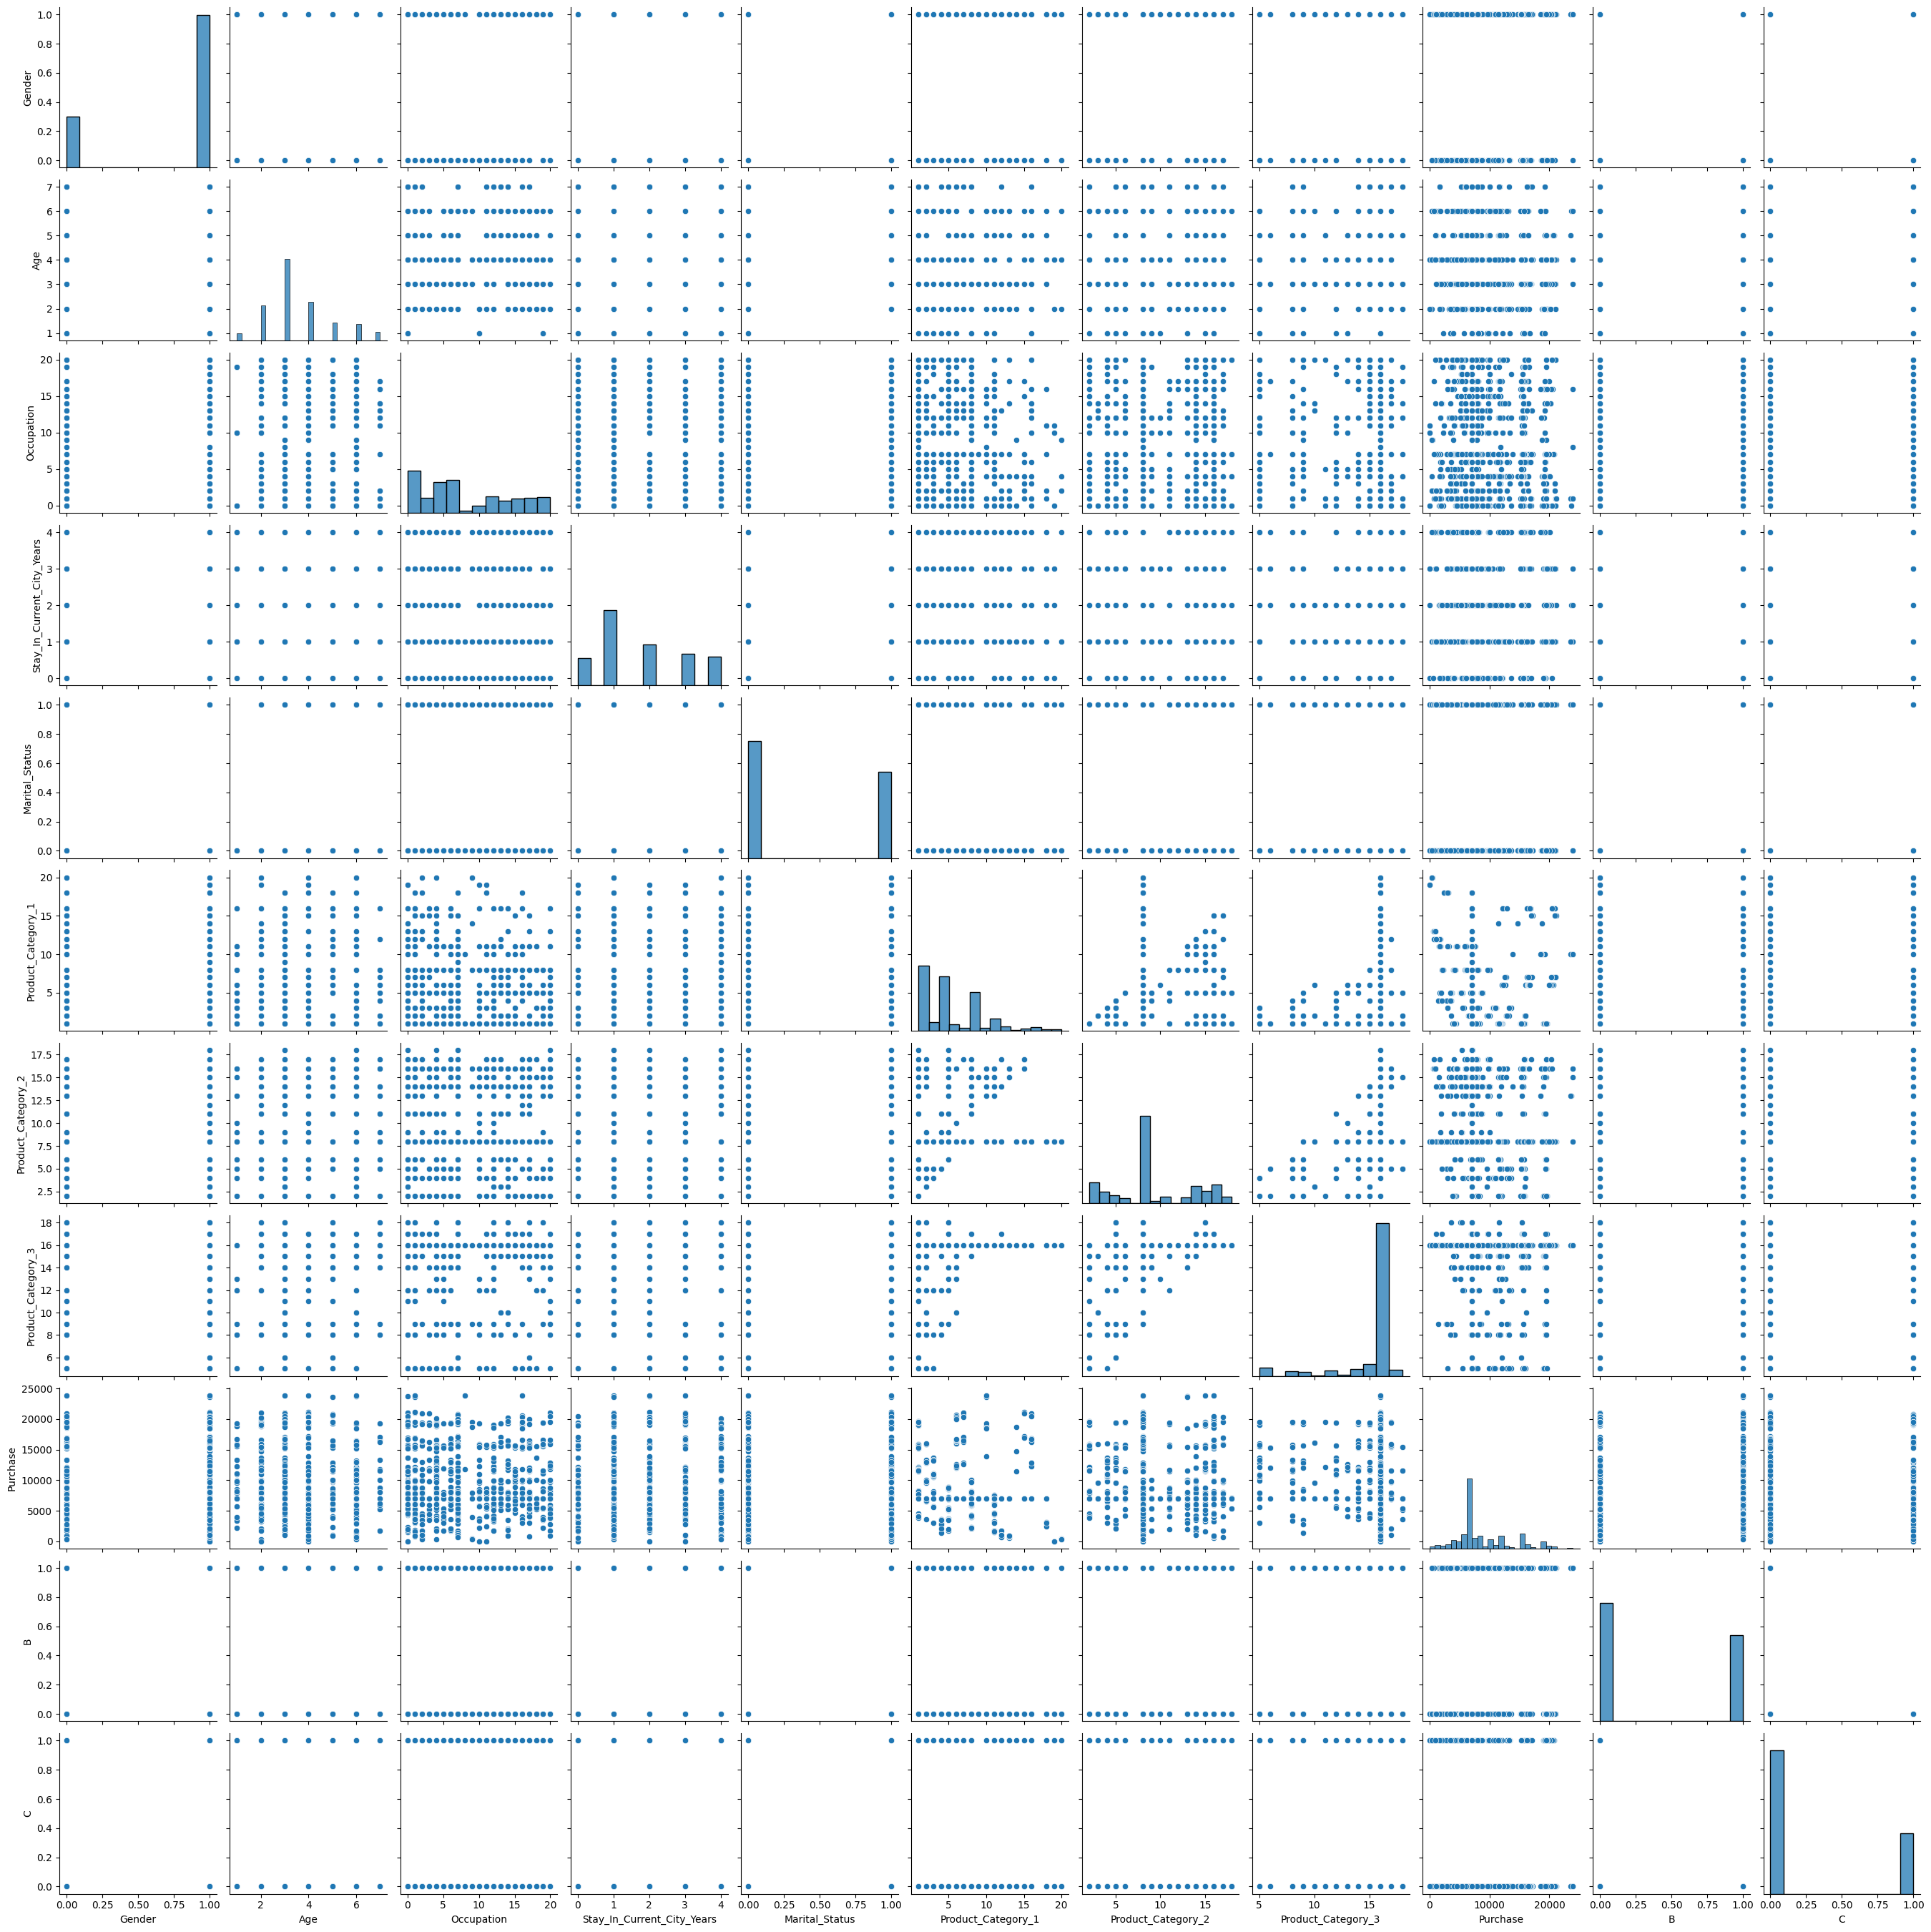

In [135]:
sns.pairplot(dff.sample(1000))

#### Bar-plot

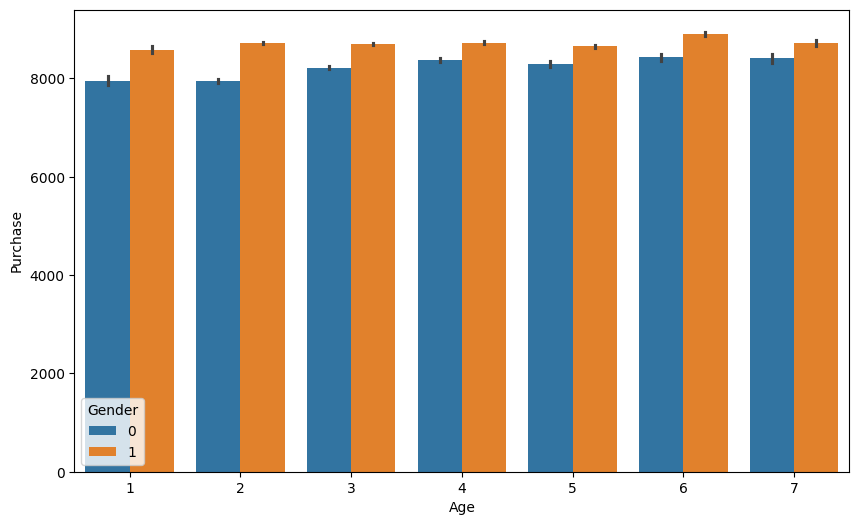

In [146]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Age',y = 'Purchase',hue='Gender',data=dff)
plt.show()

#### Observation: Purchasing of men is higher than women

#### Visulization of purchase with occupation

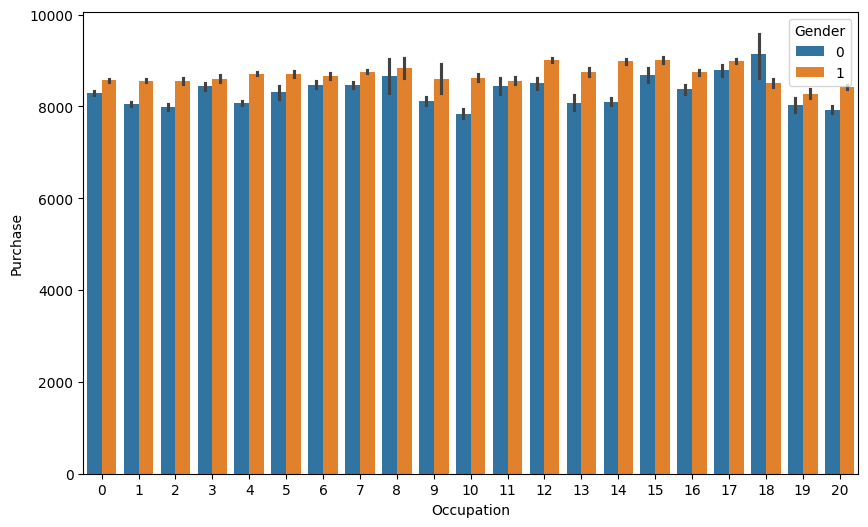

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=dff)
plt.show()

#### Visulization of purchase with product category1




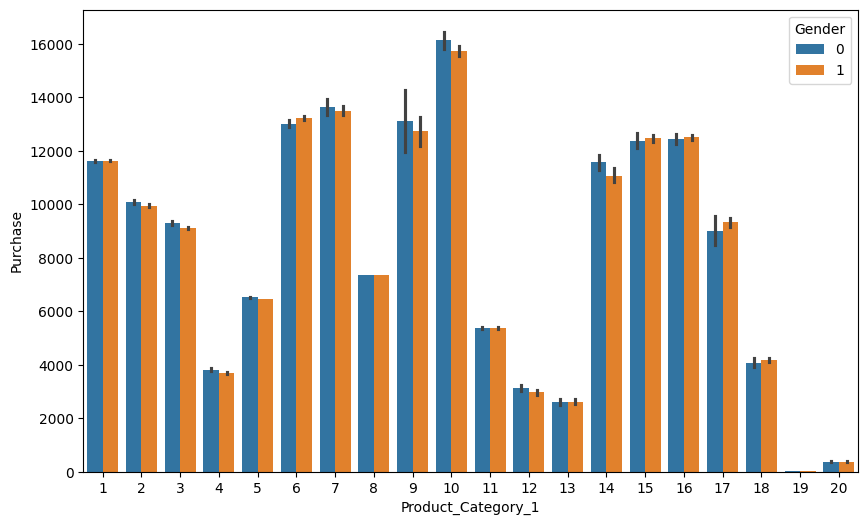

In [144]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=dff)
plt.show()

#### Visulization of purchase with product category 2

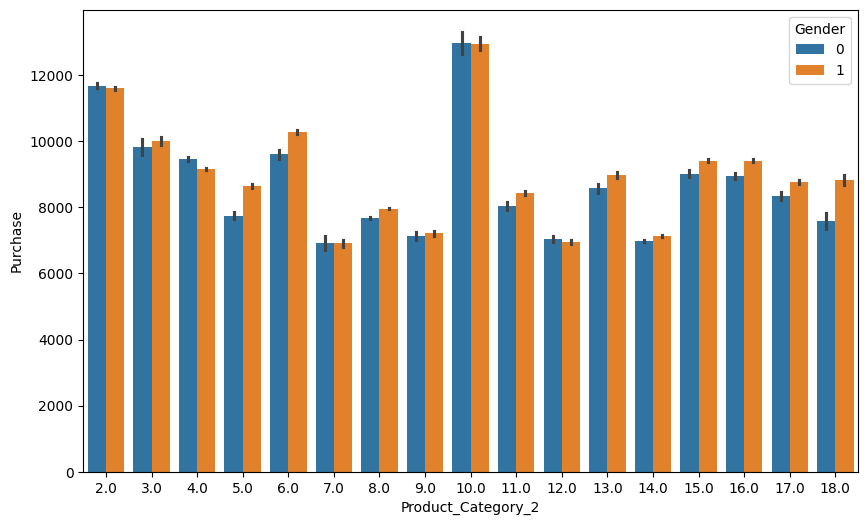

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=dff)
plt.show()

#### Visulization of purchase with product category 3

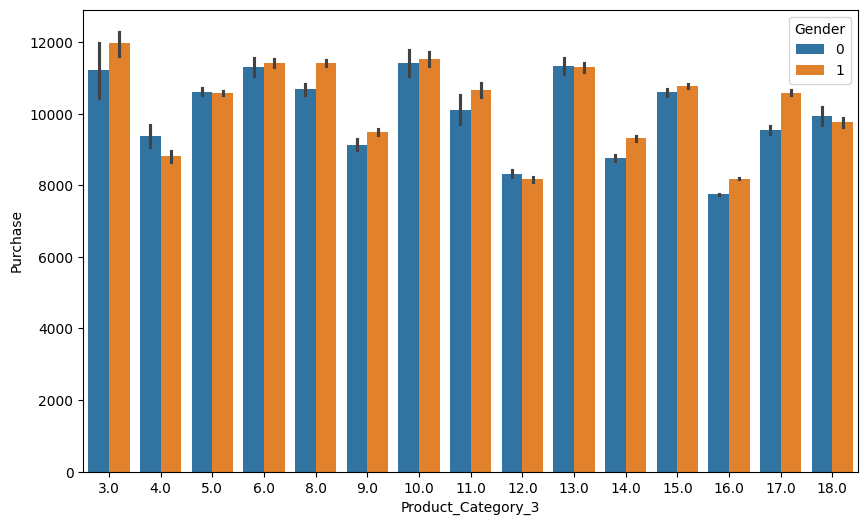

In [147]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=dff)
plt.show()

#### Observation: As you can see in product_category 1 the purchase limit it till 20k whereas in product_category 2 it is till 16k and in product_catgory 3 it is 12k
1. So Product_category 1 is purchased the maximum
2. Then Product_category 2
3. At last Product_category 3

In [148]:
dff.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


#### We can also drop product_id

In [152]:
dff.drop('Product_ID',axis=1,inplace=True)

In [153]:
dff.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


#### Now let's do feature scaling

In [154]:
df_test = dff[dff['Purchase'].isnull()]

In [155]:
df_train = dff[~dff['Purchase'].isnull()]

#### Let's split the dataset

In [157]:
from sklearn.model_selection import train_test_split

In [175]:
X  = df_train.drop('Purchase',axis=1)

In [176]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [177]:
X.shape

(783667, 10)

In [178]:
y = df_train['Purchase']

In [179]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [180]:
y.shape

(783667,)

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)

#### We basically apply standard scalar as feature scaling

In [183]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
632160,0,1,10,2,0,1,8.0,16.0,0,0
668478,1,3,18,1,1,5,8.0,14.0,0,0
662790,1,3,1,4,0,8,14.0,16.0,0,1
154561,1,3,1,1,1,5,8.0,14.0,0,0
256435,0,3,6,4,0,8,8.0,16.0,1,0


In [184]:
!pip install scikit-learn

In [187]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Train the model